In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import random

# data

In [2]:
data_1d = pd.read_csv('RegData.csv', header=None)
X_1d = data_1d[0]
y_1d = data_1d[1]

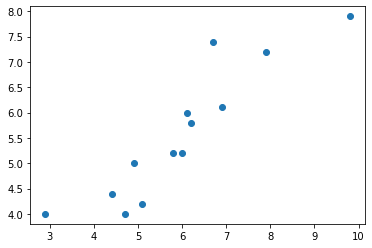

In [3]:
plt.scatter(X_1d, y_1d)
plt.show()

In [4]:
data_2d = pd.read_csv('MultipleLR.csv', header=None)
X_2d= data_2d.iloc[:,:-1]
y_2d = data_2d.iloc[:,-1:]

# minibatch

In [5]:
def slicing(X, y, size):
    i=0
    slices_X = []
    slices_y = []
    while(i<len(X)):
        if (i+size) > len(X):
            slices_X.append(X[i:])
            slices_y.append(y[i:])
            break
        else:
            slices_X.append(X[i:i+size])
            slices_y.append(y[i:i+size])
            i+=size
    return slices_X, slices_y

In [6]:
x_s, y_s = slicing(X_2d, y_2d, 3)
#shuffle batches
c = list(zip(x_s, y_s))
random.shuffle(c)
x_s, y_s = zip(*c)
x_s

(    0   1    2
 3  96  98  100
 4  73  66   70
 5  53  46   55,
      0   1   2
 9   79  70  88
 10  69  70  73
 11  70  65  74,
     0   1   2
 0  73  80  75
 1  93  88  93
 2  89  91  90,
      0   1   2
 21  86  82  89
 22  78  83  85
 23  76  83  71,
      0   1   2
 18  88  92  86
 19  78  83  77
 20  82  86  90,
      0   1   2
 24  96  93  95,
      0   1   2
 12  93  95  91
 13  79  80  73
 14  70  73  78,
     0   1   2
 6  69  74  77
 7  47  56  60
 8  87  79  90,
      0   1   2
 15  93  89  96
 16  78  75  68
 17  81  90  93)

In [7]:
slicing(X_1d, y_1d, 7)

([0    2.9
  1    6.7
  2    4.9
  3    7.9
  4    9.8
  5    6.9
  6    6.1
  Name: 0, dtype: float64,
  7     6.2
  8     6.0
  9     5.1
  10    4.7
  11    4.4
  12    5.8
  Name: 0, dtype: float64],
 [0    4.0
  1    7.4
  2    5.0
  3    7.2
  4    7.9
  5    6.1
  6    6.0
  Name: 1, dtype: float64,
  7     5.8
  8     5.2
  9     4.2
  10    4.0
  11    4.4
  12    5.2
  Name: 1, dtype: float64])

In [8]:
def GD_minibatch(X, Y, n_iters, theta_0=0, theta_1=0, learning_rate=0.001, batch_size=3):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = theta_0, theta_1
    learning_rate = learning_rate
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(x_slices,y_slices):
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
            h_theta = theta_0 + theta_1*x

            #Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
            m = len(x)
            MSE = (1/(2*m))* sum((h_theta - y)**2)
            MSE_list.append(MSE)
            #Step4: Calculate the gradient.
            drev_theta0 = (1/m) * sum(h_theta - y)
            drev_theta1 = (1/m) * sum( (h_theta - y)* x)

            #Step5: Update the parameters (simultaneously).
            theta_0 = theta_0 - learning_rate*drev_theta0
            theta_1 = theta_1 - learning_rate*drev_theta1

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.01):
            break

        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.3:
            break
        
    return theta_0, theta_1, MSE_list

In [9]:
theta_0, theta_1, error_list = GD_minibatch(X_1d, y_1d, 2000, 0, 0, 0.001, 2)

In [10]:
h_theta = theta_0 + theta_1*X_1d

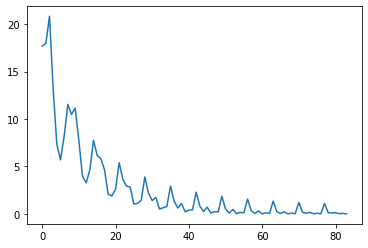

In [11]:
plt.plot(error_list);

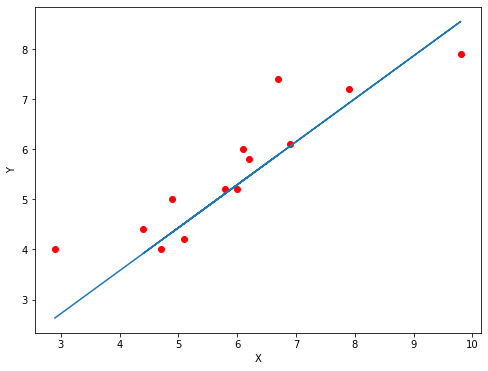

In [12]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# multi variable

In [13]:
def GD_MV_MB(X, Y, n_iters, learning_rate=0.001, batch_size = 3):
    X = X.values
    Y = Y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    learning_rate = learning_rate
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(x_slices,y_slices):
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
            h_theta = x@theta
#             print(x.shape) #batch_size * m
#             print(theta.shape) # m * 1 
#             print(h_theta.shape) # batch_size * 1
            #Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
            m = len(X)
            err = h_theta - y
            MSE = (1/(2*m))*((err.T) @ err)
            MSE_list.append(MSE[0][0])
            #Step4: Calculate the gradient.
            drev = (1/m)* (x.T @ err)
            # drev -> 4,1

            #Step5: Update the parameters (simultaneously).
            theta = theta - learning_rate*drev
            #theta -> 4,1

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.0001):
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.1:
            break
        
    return theta, MSE_list

In [14]:
theta, error_list = GD_MV_MB(X_2d, y_2d, 1000,0.0001, 4)

In [15]:
h_theta = X_2d@theta

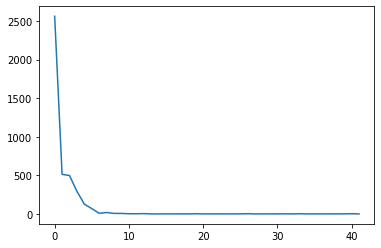

In [16]:
plt.plot(error_list);

# multivarible + minibatch + nag

In [17]:
def Nag_MV_MB(X, Y, n_iters, learning_rate=0.001, batch_size = 3, gamma=0.9):
    X = X.values
    Y = Y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    v_theta = np.zeros([X.shape[1],1])
    learning_rate = learning_rate
    gamma = gamma
    
    
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(x_slices,y_slices):
            m = len(x)
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
            theta_temp = theta - gamma*v_theta
            h_theta = x@theta_temp
            
            err = h_theta - y
            drev_theta_temp = (1/m)* (x.T @ err)
            
            theta = theta_temp - learning_rate*drev_theta_temp
            v_theta = gamma*v_theta + learning_rate*drev_theta_temp
            
            h_theta = x@theta
            err = h_theta - y
            MSE = (1/(2*m))*((err.T) @ err)
            MSE_list.append(MSE[0][0])

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.0001):
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.1:
            break
        
    return theta, MSE_list

In [18]:
theta, error_list = Nag_MV_MB(X_2d, y_2d, 1000, 0.00001, 4, gamma=0.9)

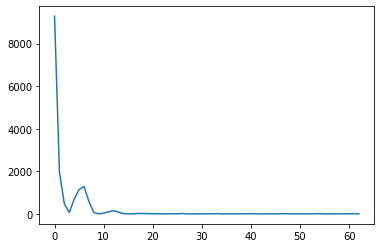

In [19]:
plt.plot(error_list)

In [20]:
h_theta = X_2d@theta

In [21]:
r2_score(y_2d, h_theta)

0.9815035782277367

# multivariable + minibatch + adagrad

In [22]:
def adagrad_MV_MB(X, Y, n_iters, learning_rate=0.001, batch_size = 3):
    X = X.values
    Y = Y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    v_theta = np.zeros([X.shape[1],1])
    learning_rate = learning_rate
    
    epsilon = 10**(-8)
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(x_slices,y_slices):
            m = len(x)
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

            h_theta = x@theta
            err = h_theta - y
            drev_theta = (1/m)* (x.T @ err)

            v_theta = v_theta + (drev_theta**2)
            
            theta = theta - (learning_rate/ ((v_theta**0.5)+epsilon))*drev_theta
            
            
            h_theta = x@theta
            err = h_theta - y
            MSE = (1/(2*m))*((err.T) @ err)
            MSE_list.append(MSE[0][0])

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.1):
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.1:
            break
        
    return theta, MSE_list

In [23]:
theta, error_list = adagrad_MV_MB(X_2d, y_2d, 10000, 0.01, 4)

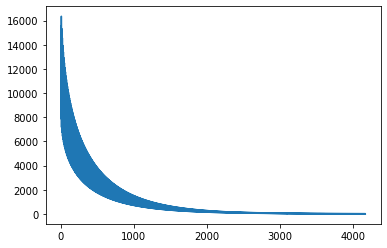

In [24]:
plt.plot(error_list);

In [25]:
h_theta = X_2d@theta

In [26]:
r2_score(y_2d, h_theta)

0.9568944767339013

# multivariable + minibatch + rms 

In [27]:
def rms_MV_MB(X, Y, n_iters, learning_rate=0.001, batch_size = 3, beta = 0.9):
    X = X.values
    Y = Y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    v_theta = np.zeros([X.shape[1],1])
    beta= beta
    learning_rate = learning_rate
    
    epsilon = 10**(-8)
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(x_slices,y_slices):
            m = len(x)
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

            h_theta = x@theta
            err = h_theta - y
            drev_theta = (1/m)* (x.T @ err)

            v_theta = (beta*v_theta) + ((1-beta)*(drev_theta**2))
            
            theta = theta - (learning_rate/ ((v_theta**0.5)+epsilon))*drev_theta
            
            
            h_theta = x@theta
            err = h_theta - y
            MSE = (1/(2*m))*((err.T) @ err)
            MSE_list.append(MSE[0][0])

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.00001):
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.00001:
            break
        
    return theta, MSE_list

In [28]:
theta , error_list = rms_MV_MB(X_2d, y_2d, 10000, 0.001, 3, 0.9)

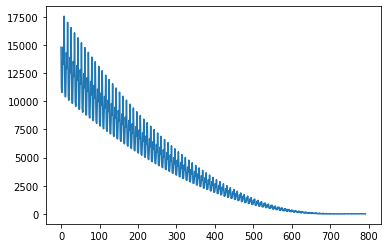

In [29]:
plt.plot(error_list);

In [30]:
h_theta = X_2d@theta
r2_score(y_2d, h_theta)

0.9784740739693557

# multivariate+ minibatch + adam + biascorr

In [31]:
def adam_biascorr_MV_MB(X, Y, n_iters, learning_rate=0.001, batch_size = 3, beta1=0.9, beta2=0.99):
    X = X.values
    Y = Y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    v_theta = np.zeros([X.shape[1],1])
    m_theta = np.zeros([X.shape[1], 1])
    epsilon = 10**(-8)
    learning_rate = learning_rate
    beta1 = beta1
    beta2 = beta2
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        #shuffle batches
        c = list(zip(x_slices, y_slices))
        random.shuffle(c)
        x_slices, y_slices = zip(*c)
        for j, (x, y) in enumerate(zip(x_slices,y_slices)):
            h_theta = x@theta
            
            m = len(x)
            err = h_theta - y
            #Step4: Calculate the gradient.
            drev = (1/m)* (x.T @ err)
            # drev -> 4,1

            #Step5: Update the parameters (simultaneously).
            
            m_theta = beta1*m_theta + (1-beta1)* drev
            m_theta_corr = m_theta/(1-beta1**((i+1)*(j+1)))
            
            v_theta = beta2*v_theta + (1-beta2)* (drev**2)
            v_theta_corr = v_theta/(1-beta2**((i+1)*(j+1)))
            
            theta = theta - ( (learning_rate* m_theta_corr)/( (v_theta_corr)**0.5 + epsilon))
            
            err = h_theta - y
            MSE = (1/(2*m))*((err.T) @ err)
            MSE_list.append(MSE[0][0])
        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.01) :
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.001:
            break
        
    return theta, MSE_list

In [32]:
theta, error_list = adam_biascorr_MV_MB(X_2d, y_2d, 1000, 0.001, 7, 0.5, 0.9)

In [33]:
error_list[-1]

6.414317623501423

In [34]:
h_theta = X_2d@theta

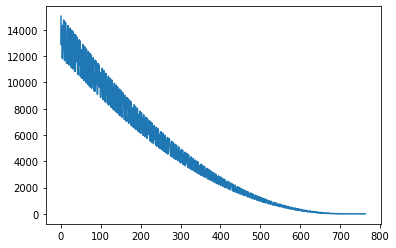

In [35]:
plt.plot(error_list);

In [36]:
r2_score(y_2d, h_theta)

0.978433552248527

# minibatch + adam + biascorrection 1d

In [159]:
def adam_biascorr_minibatch(X, Y, n_iters, theta_0=0, theta_1=0, beta1=0.9, beta2=0.99, learning_rate=0.001, batch_size=3):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    m_theta0, m_theta1 = 0, 0
    epsilon = 10**(-8)
    learning_rate = learning_rate
    beta1 = beta1
    beta2 = beta2
    
    MSE_list = []
    x_slices, y_slices = slicing(X, Y, batch_size)
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for j, (x, y) in enumerate(zip(x_slices,y_slices)):
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
            h_theta = theta_0 + theta_1*x

            m = len(x)
            #Step4: Calculate the gradient.
            drev_theta0 = (1/m) * sum(h_theta - y)
            drev_theta1 = (1/m) * sum( (h_theta - y)* x)

            #Step5: Update the parameters (simultaneously).
            #momentum
            m_theta0 = beta1*m_theta0 + (1-beta1)*drev_theta0
            m_theta1 = beta1*m_theta1 + (1-beta1)*drev_theta1

            m0_update = m_theta0/(1-beta1**((i+1)*(j+1)))
            m1_update = m_theta1/(1-beta1**((i+1)*(j+1)))

            #rms effective learning rate
            #dec learning rate for large gradient
            #inc learning rate for small gradient
            v_theta0 = beta2*v_theta0 + (1-beta2)*(drev_theta0)**2
            v_theta1 = beta2*v_theta1 + (1-beta2)*(drev_theta1)**2

            v0_update = v_theta0/(1-beta2**((i+1)*(j+1)))
            v1_update = v_theta1/(1-beta2**((i+1)*(j+1)))

            theta_0 = theta_0 - ((learning_rate* m0_update) / ((v0_update)**0.5 +epsilon))
            theta_1 = theta_1 - ((learning_rate* m1_update) / ((v1_update)**0.5 +epsilon))

            #Step: Calculate Cost function 𝑱(theta_0,theta_1 ).
            m = len(x)
            MSE = (1/(2*m))* sum((h_theta - y)**2)
            MSE_list.append(MSE)
        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.0001):
            break

        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if (i > 0) and (gradient < 0.001):
            break
        
    return theta_0, theta_1, MSE_list

In [171]:
theta_0, theta_1, error_list =  adam_biascorr_minibatch(X_1d, y_1d, 10000, theta_0=0, theta_1=0, beta1=0.9, beta2=0.99, learning_rate=0.001, batch_size=3)

In [172]:
h_theta = theta_0 + theta_1*X_1d

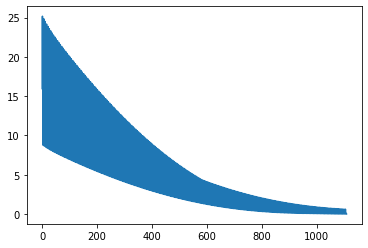

In [173]:
plt.plot(error_list);

In [174]:
error_list[-1]

1.2133036005687968e-05

In [164]:
r2_score(y_1d, h_theta)

0.773310761958647